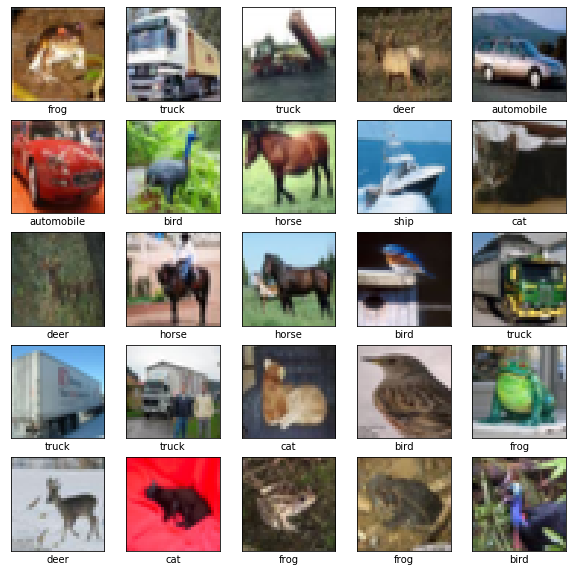

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import time

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

mean = np.mean(train_images,axis=(0,1,2,3))
std = np.std(train_images,axis=(0,1,2,3))
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = (train_images-mean)/std
test_images = (test_images-mean)/std

train_labels = tf.keras.utils.to_categorical(train_labels,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      featurewise_center=False,
      samplewise_center=False,
      featurewise_std_normalization=False,
      samplewise_std_normalization=False,
      zca_whitening=False,
      rotation_range=0,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False)

datagen.fit(train_images)

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=tf.keras.regularizers.l2(l=1e-4), input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(l=1e-4), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(l=1e-4), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(l=1e-4), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(l=1e-4), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(l=1e-4), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(l=1e-4), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (1, 1), activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(l=1e-4), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
start = time.time()

history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    steps_per_epoch=50000/64, epochs=200, verbose=1,
                    validation_data=(test_images, test_labels))

end = time.time()

Epoch 1/200
782/781 [==============================] - 41s 53ms/step - loss: 3.9663 - acc: 0.2257 - val_loss: 2.0423 - val_acc: 0.3746
Epoch 2/200
782/781 [==============================] - 35s 45ms/step - loss: 2.6106 - acc: 0.3140 - val_loss: 1.9632 - val_acc: 0.3725
Epoch 3/200
782/781 [==============================] - 35s 45ms/step - loss: 2.2350 - acc: 0.3682 - val_loss: 2.0016 - val_acc: 0.3718
Epoch 4/200
782/781 [==============================] - 36s 45ms/step - loss: 2.0375 - acc: 0.4199 - val_loss: 1.9901 - val_acc: 0.3828
Epoch 5/200
782/781 [==============================] - 36s 46ms/step - loss: 1.9010 - acc: 0.4513 - val_loss: 1.9580 - val_acc: 0.4104
Epoch 6/200
782/781 [==============================] - 36s 45ms/step - loss: 1.7880 - acc: 0.4828 - val_loss: 1.6634 - val_acc: 0.4931
Epoch 7/200
782/781 [==============================] - 35s 45ms/step - loss: 1.6943 - acc: 0.5094 - val_loss: 1.6143 - val_acc: 0.5125
Epoch 8/200
782/781 [==============================] - 

10000/10000 - 1s - loss: 0.4756 - acc: 0.8862


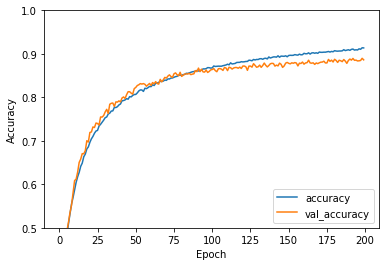

In [ ]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print("Acc="+str(test_acc))
print("Lost="+str(test_loss))
print("Time="+str((end-start)/60)+"mins")

Acc=0.8862
Lost=0.4756260422706604
Time=116.92113793691mins
